In [1]:
from matplotlib import pyplot as plt
import scipy.special 
import random
import numpy as py 
import matplotlib.pyplot 
import time
%matplotlib inline

In [2]:
class neuralNetwork:
    
    # Initialise the neural network.
    def __init__(self, inputnodes ,hiddennodes ,outputnodes ,learningrate):
        
        # Set number of nodes in each layer.
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Weights inside the arrays are w_i_j, meaning link from node i to node j in the next layer.
        
        # Method 1 of creating the weight matricies.
        
        #self.wih1 = (py.random.rand(self.hnodes, self.inodes) - 0.5)
        #self.who2 = (py.random.rand(self.onodes, self.hnodes) - 0.5)
        
        # Creating weight matricies.
        
        self.wih = py.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = py.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # Set the learning rate.
        self.lr = learningrate
        
        # Activation function.
        self.activationfunction = lambda x: scipy.special.expit(x)
        
        pass
    
    # Train the neural network.
    def train(self, inputs_list, targets_list):
        
        # Convert lists into a 2D array.
        inputs = py.array(inputs_list, ndmin = 2).T
        targets = py.array(targets_list, ndmin = 2).T

        # Calculate signals into hidden layer.
        hiddeninputs = py.dot(self.wih, inputs)
        # Calculate signals emerging from hidden layer. 
        hiddenoutputs = self.activationfunction(hiddeninputs)
        
        # Calulate signals into final layer.
        finalinputs = py.dot(self.who, hiddenoutputs)
        # Calculate final layer outputs.
        finaloutputs = self.activationfunction(finalinputs)
        
        # The error is (target - actual).
        outputerrors = targets - finaloutputs 
        # Hidden error is the output error, split by the weights and recombined at the hidden nodes.
        hiddenerrors = py.dot(self.who.T, outputerrors)
        
        
        # Update the weights for the links between the hidden and output layers using the gradeint descent method.
        self.who += self.lr * py.dot(outputerrors * finaloutputs * (1 - finaloutputs), py.transpose(hiddenoutputs))
        # Update the weights for the links between the input and hidden layers using the same method.
        self.wih += self.lr * py.dot(hiddenerrors * hiddenoutputs * (1 - hiddenoutputs), py.transpose(inputs))
        
        pass
    
    # Query the neural network.
    def query(self, inputs_list):
        
        # Convert input list into a 2D array.
        inputs = py.array(inputs_list, ndmin = 2).T
        
        # Calculate signals into hidden layer.
        hiddeninputs = py.dot(self.wih, inputs)
        # Calculate signals emerging from hidden layer. 
        hiddenoutputs = self.activationfunction(hiddeninputs)
        
        # Calulate signals into final layer.
        finalinputs = py.dot(self.who, hiddenoutputs)
        # Calculate final layer outputs.
        finaloutputs = self.activationfunction(finalinputs)

        return finaloutputs

    def test_performance(self):
        scorecard = []
        # Go through all the records in the test data set.
        for record in test_data_list:
            # Split the record by the ',' commas.
            all_values = record.split(',')
            # Correct answer is first value.
            correct_label = int(all_values[0])
            # Scale and shift the inputs.
            inputs = (py.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # Query the network.
            outputs = alan.query(inputs)
            # The index of the highest value corresponds to the label.
            label = py.argmax(outputs)
            # Append correct or incorrect to list.
            if (label == correct_label):
                # Network's answer matches correct answer, add 1 to scorecard.
                scorecard.append(1)
            else:
                # Network's answer doesn't match correct answer, add 0 to scorecard>
                scorecard.append(0)
                pass
            
            pass
            
        scorecard_array = py.asarray(scorecard)
        performance = scorecard_array.sum() / scorecard_array.size * 100
        return performance



In [3]:
# Number of input, hidden and output nodes.
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rates = [0.001, 0.1, 0.2, 0.4, 0.5, 0.9, 0.99]
performances = []

# Import data sets for training and testing.
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
test_data_list = open("mnist_test.csv", 'r').readlines()

# Create instances of neural network and train a network for each learning rate.
for learning_rate in learning_rates:
    
    alan = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

    # Train the network
        # Go through all the records in the training data set.
    for record in training_data_list:
        # Split the data at the commas.
        allvalues = record.split(',')
        # Scale and shift the inputs.
        inputs = (py.asfarray(allvalues[1:]) / 255 * 0.99) + 0.01
        # Create the target output values (all 0.01 apart from the derised label which will be 0.99)
        targets = py.zeros(output_nodes) + 0.01
        # allvalues[0] is the target label for this.
        targets[int(allvalues[0])] = 0.99
        
        alan.train(inputs, targets)
        
        pass

    # Measure performance
    performances.append(alan.test_performance())
    

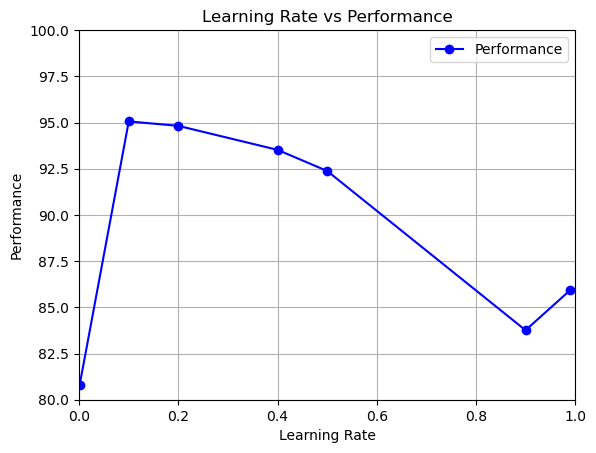

In [4]:
plt.plot(learning_rates, performances, 'bo-', label='Performance')

# Add labels and title
plt.title('Learning Rate vs Performance')
plt.xlabel('Learning Rate')
plt.ylabel('Performance')
plt.ylim(80, 100)
plt.xlim(0, 1)


# Show legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

Clearly the optimal learning rate lies between 0.1 and 0.3, so we test again with a range of epochs to find how to get the best performance

In [6]:

learning_rates = [0.1, 0.2, 0.3]
epoch = 8
performance_dict = {}

for learning_rate in learning_rates:

    performance = []
    alan = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

    # Train the network
        # Go through all the records in the training data set.
    for record in training_data_list:
        # Split the data at the commas.
        allvalues = record.split(',')
        # Scale and shift the inputs.
        inputs = (py.asfarray(allvalues[1:]) / 255 * 0.99) + 0.01
        # Create the target output values (all 0.01 apart from the derised label which will be 0.99)
        targets = py.zeros(output_nodes) + 0.01
        # allvalues[0] is the target label for this.
        targets[int(allvalues[0])] = 0.99
        
        alan.train(inputs, targets)
    
    for entry in range(epoch):
        # Go through all the records in the training data set.
        for record in training_data_list:
            # Split the data at the commas.
            allvalues = record.split(',')
            # Scale and shift the inputs.
            inputs = (py.asfarray(allvalues[1:]) / 255 * 0.99) + 0.01
            # Create the target output values (all 0.01 apart from the derised label which will be 0.99)
            targets = py.zeros(output_nodes) + 0.01
            # allvalues[0] is the target label for this.
            targets[int(allvalues[0])] = 0.99
            
            alan.train(inputs, targets)
        performance.append(alan.test_performance())
    performance_dict[learning_rate] = performance

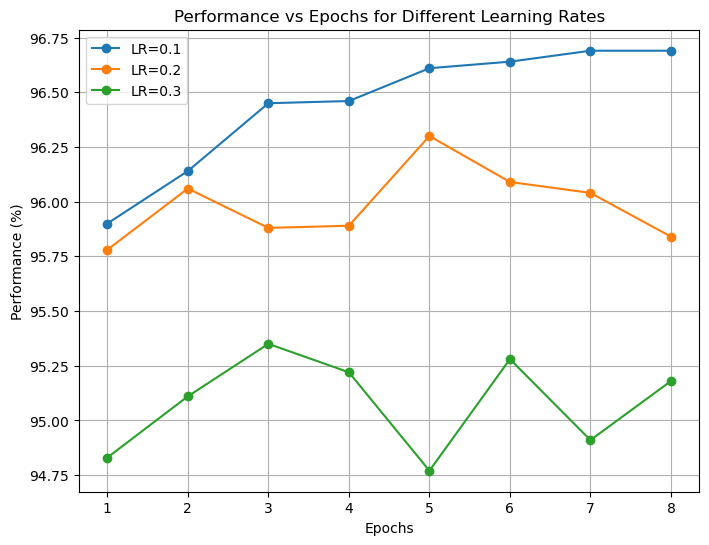

In [21]:
plt.figure(figsize=(8, 6))

for learning_rate, performance in performance_dict.items():
    plt.plot(range(1, epoch + 1), performance, marker='o', label=f'LR={learning_rate}')

# Formatting the plot
plt.title('Performance vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Performance (%)')
plt.legend()
plt.grid()
plt.show()

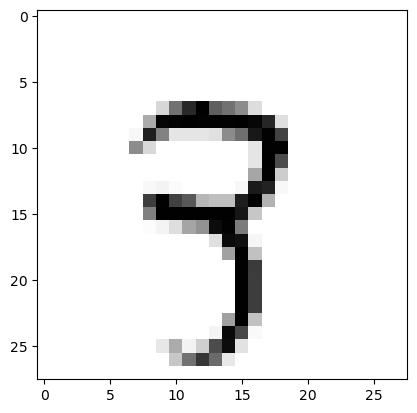

Alan thinks that this is: 3
This is correct


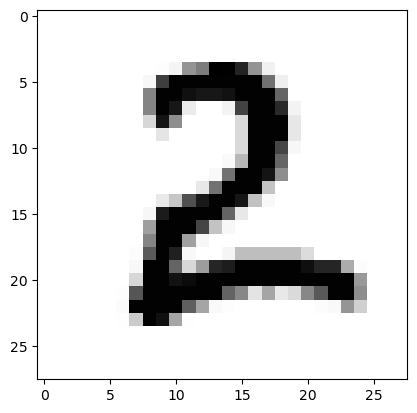

Alan thinks that this is: 2
This is correct


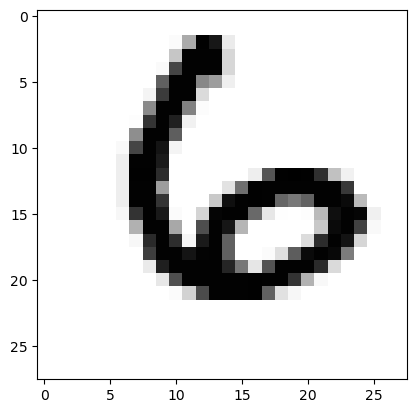

Alan thinks that this is: 6
This is correct


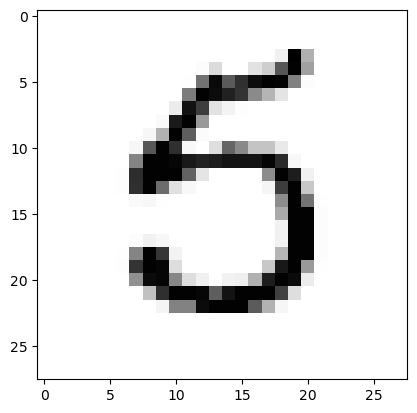

Alan thinks that this is: 5
This is correct


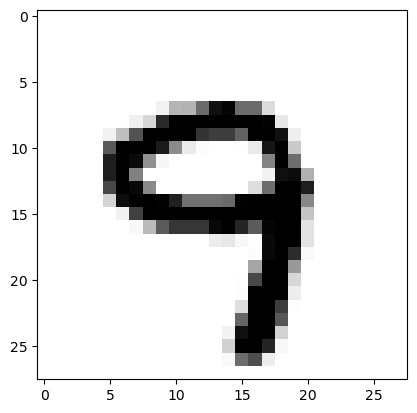

Alan thinks that this is: 9
This is correct


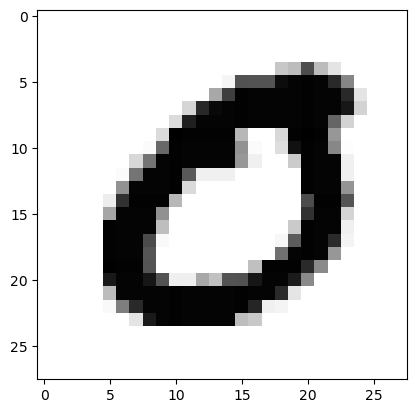

Alan thinks that this is: 0
This is correct


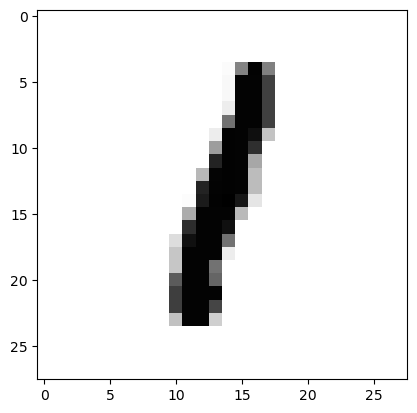

Alan thinks that this is: 1
This is correct


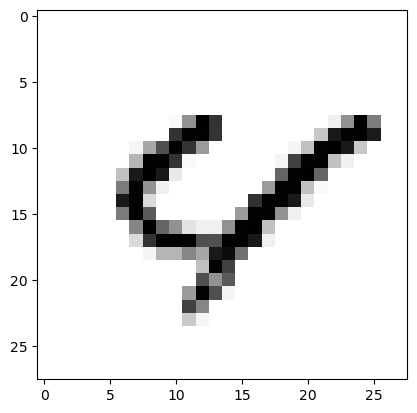

Alan thinks that this is: 4
This is correct


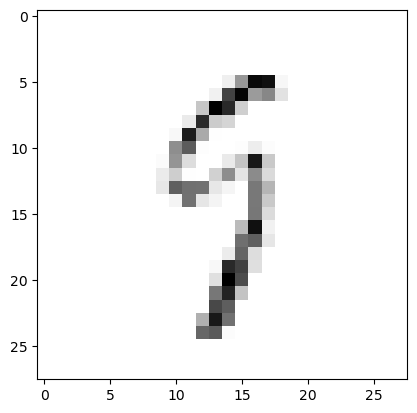

Alan thinks that this is: 9
This is correct


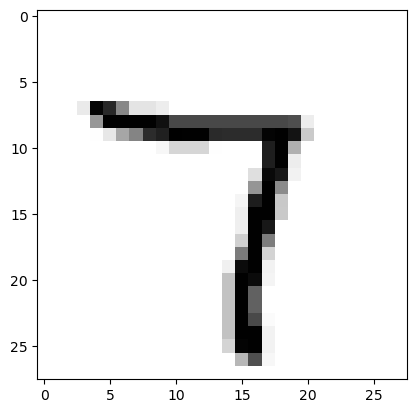

Alan thinks that this is: 7
This is correct


In [8]:
for i in range(10):
    
    x = random.randint(1,9999)
    
    allvalues = test_data_list[x].split(',')
    
    # Plot the data, showing the number it is.
    imagearray = py.asfarray(allvalues[1:]).reshape((28,28))
    matplotlib.pyplot.imshow(imagearray, cmap = 'Greys', interpolation = 'None')
    matplotlib.pyplot.show()
    
    result = py.argmax(alan.query((py.asfarray(allvalues[1:])/ 255 * 0.99) + 0.01))

    print("Alan thinks that this is:",result)

    if int(result) == int(allvalues[0]):
        print('This is correct')
    else:
        print('This is incorrect')
    time.sleep(0.2)
    

Above, for illistration we show the labelling the NN has given the inputs.